In [1]:
pwd

'/Users/brent/Documents/docs-shufe/ml_basic/proj/nbs'

In [2]:
cd ..

/Users/brent/Documents/docs-shufe/ml_basic/proj


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
import sys
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn import neighbors
from sklearn import metrics

In [5]:
# data=pd.read_csv('final/final_ft_application_train.sample.csv').fillna(0)
data=pd.read_csv('final/final_ft_application_train.csv').fillna(0)
predictor=[x for x in data.columns if x !='TARGET']

In [6]:
# define the CV
cv = StratifiedKFold(n_splits=5)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[predictor],data['TARGET'], test_size=0.2, random_state=1211)

In [8]:
df_sparsity = 1 - X_train.isna().sum() / X_train.shape[0]

In [9]:
df_sparsity.sort_values()

SK_ID_CURR                                                                      1.0
Default_BINNED_M6_sum_sum                                                       1.0
Default_BINNED_M7_mean_mean                                                     1.0
Default_BINNED_M7_sum_sum                                                       1.0
Default_BINNED_M7+_mean_mean                                                    1.0
                                                                               ... 
ft_WEEKDAY_APPR_PROCESS_START_MONDAY_median                                     1.0
ft_WEEKDAY_APPR_PROCESS_START_SATURDAY_mean                                     1.0
ft_WEEKDAY_APPR_PROCESS_START_SATURDAY_median                                   1.0
ft_OCCUPATION_TYPE_High skill tech staff_median                                 1.0
previous_application_ft_PRODUCT_COMBINATION_POS others without interest_mean    1.0
Length: 975, dtype: float64

In [10]:
hyperparams= {
  'alpha':[0.0001, 0.01, 0.1],
  'l1_ratio': [0.5, 0.9, 0.95]
}

In [11]:
md = linear_model.SGDClassifier(
  loss='log', 
  penalty='elasticnet',
  class_weight='balanced',
  n_iter_no_change=20,
  early_stopping=True,
  verbose=2
)

In [13]:
gs = GridSearchCV(
  md, hyperparams,
  n_jobs=6,
  cv=cv,
  scoring='roc_auc'
)
gs.fit(X_train, y_train)

-- Epoch 1
Norm: 24652.97, NNZs: 101, Bias: -0.717742, T: 221407, Avg. loss: 491481130.461179
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 25954.67, NNZs: 93, Bias: -0.719832, T: 442814, Avg. loss: 33326094.423553
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 26668.85, NNZs: 93, Bias: -0.735662, T: 664221, Avg. loss: 18649678.345431
Total training time: 2.57 seconds.
-- Epoch 4
Norm: 27150.49, NNZs: 93, Bias: -0.715043, T: 885628, Avg. loss: 12537483.723919
Total training time: 3.52 seconds.
-- Epoch 5
Norm: 27507.17, NNZs: 89, Bias: -0.747487, T: 1107035, Avg. loss: 9287677.112683
Total training time: 4.42 seconds.
-- Epoch 6
Norm: 27786.08, NNZs: 89, Bias: -0.764399, T: 1328442, Avg. loss: 7192867.954363
Total training time: 5.32 seconds.
-- Epoch 7
Norm: 27992.65, NNZs: 91, Bias: -0.765448, T: 1549849, Avg. loss: 5667397.555823
Total training time: 6.21 seconds.
-- Epoch 8
Norm: 28149.21, NNZs: 90, Bias: -0.774272, T: 1771256, Avg. loss: 4754205.539415
Total training ti

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SGDClassifier(class_weight='balanced',
                                     early_stopping=True, loss='log',
                                     n_iter_no_change=20, penalty='elasticnet',
                                     verbose=2),
             n_jobs=6,
             param_grid={'alpha': [0.0001, 0.01, 0.1],
                         'l1_ratio': [0.5, 0.9, 0.95]},
             scoring='roc_auc')

In [14]:
estimator = gs.best_estimator_

In [15]:
gs.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9}

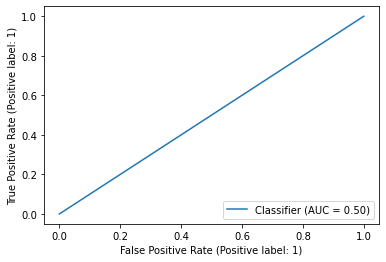

In [18]:
disp = metrics.RocCurveDisplay.from_predictions(
    y_true=y_train,
    y_pred=estimator.predict_proba(X_train)[:,1],
)

In [16]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]
y_pred_test = estimator.predict_proba(X_test)[:,1]
print(metrics.roc_auc_score(y_test, y_pred_test))

0.5002492740238268


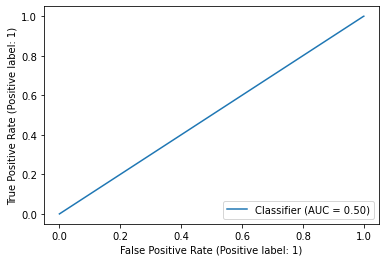

In [17]:
disp = metrics.RocCurveDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred_test,
)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
print('分类报告:\n',classification_report(y_test,y_pred_test))

分类报告:
               precision    recall  f1-score   support

         0.0       0.96      0.00      0.00     56545
         1.0       0.08      1.00      0.15      4958

    accuracy                           0.08     61503
   macro avg       0.52      0.50      0.08     61503
weighted avg       0.89      0.08      0.01     61503



In [23]:
print('混淆矩阵为：\n',confusion_matrix(y_test,y_pred_test,labels=[0,1,2]))

混淆矩阵为：
 [[   51 56494     0]
 [    2  4956     0]
 [    0     0     0]]
